In [ ]:
import os
import random
import torch
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary

from vgg_s import VGG_S
from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [22]:
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
data_dir = 'C:/Users/weron/Pulpit/sem1/dl/proj1/archive'

In [25]:
data = Data(data_dir)

# VGG S


In [27]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [28]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,248
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
        MaxPool2d-14             [-1, 6

In [29]:
sample_input = torch.randn(1, 3, 32, 32).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_input)
print(output.shape)

torch.Size([1, 10])


In [30]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5147 Acc: 0.4466
valid Loss: 1.2405 Acc: 0.5442

Epoch 1/19
----------
train Loss: 1.2044 Acc: 0.5696
valid Loss: 1.1135 Acc: 0.5984

Epoch 2/19
----------
train Loss: 1.0716 Acc: 0.6245
valid Loss: 0.9841 Acc: 0.6475

Epoch 3/19
----------
train Loss: 0.9809 Acc: 0.6563
valid Loss: 0.9269 Acc: 0.6685

Epoch 4/19
----------
train Loss: 0.9074 Acc: 0.6835
valid Loss: 0.8897 Acc: 0.6810

Epoch 5/19
----------
train Loss: 0.8517 Acc: 0.7049
valid Loss: 0.8798 Acc: 0.6891

Epoch 6/19
----------
train Loss: 0.8010 Acc: 0.7232
valid Loss: 0.8560 Acc: 0.6984

Epoch 7/19
----------
train Loss: 0.6553 Acc: 0.7734
valid Loss: 0.7669 Acc: 0.7309

Epoch 8/19
----------
train Loss: 0.6103 Acc: 0.7902
valid Loss: 0.7704 Acc: 0.7311

Epoch 9/19
----------
train Loss: 0.5838 Acc: 0.7985
valid Loss: 0.7760 Acc: 0.7325

Epoch 10/19
----------
train Loss: 0.5624 Acc: 0.8047
valid Loss: 0.7694 Acc: 0.7333

Epoch 11/19
----------
train Loss: 0.5421 Acc: 0.8134
valid Loss

In [31]:
title = 'VGG_S'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

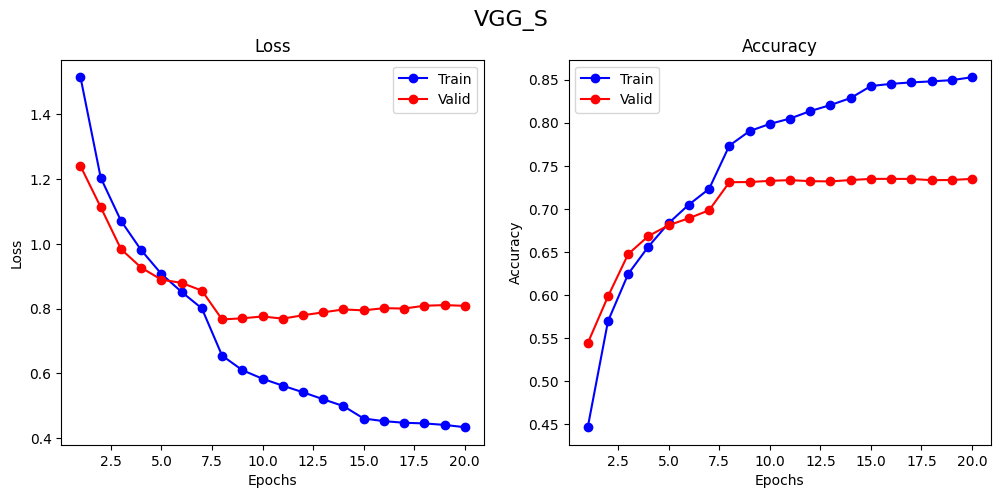

In [32]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [33]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7319

Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.81      0.81      9000
  automobile       0.78      0.79      0.78      9000
        bird       0.70      0.70      0.70      9000
         cat       0.60      0.61      0.61      9000
        deer       0.65      0.68      0.66      9000
         dog       0.61      0.55      0.57      9000
        frog       0.80      0.84      0.82      9000
       horse       0.79      0.78      0.79      9000
        ship       0.78      0.82      0.80      9000
       truck       0.78      0.74      0.76      9000

    accuracy                           0.73     90000
   macro avg       0.73      0.73      0.73     90000
weighted avg       0.73      0.73      0.73     90000



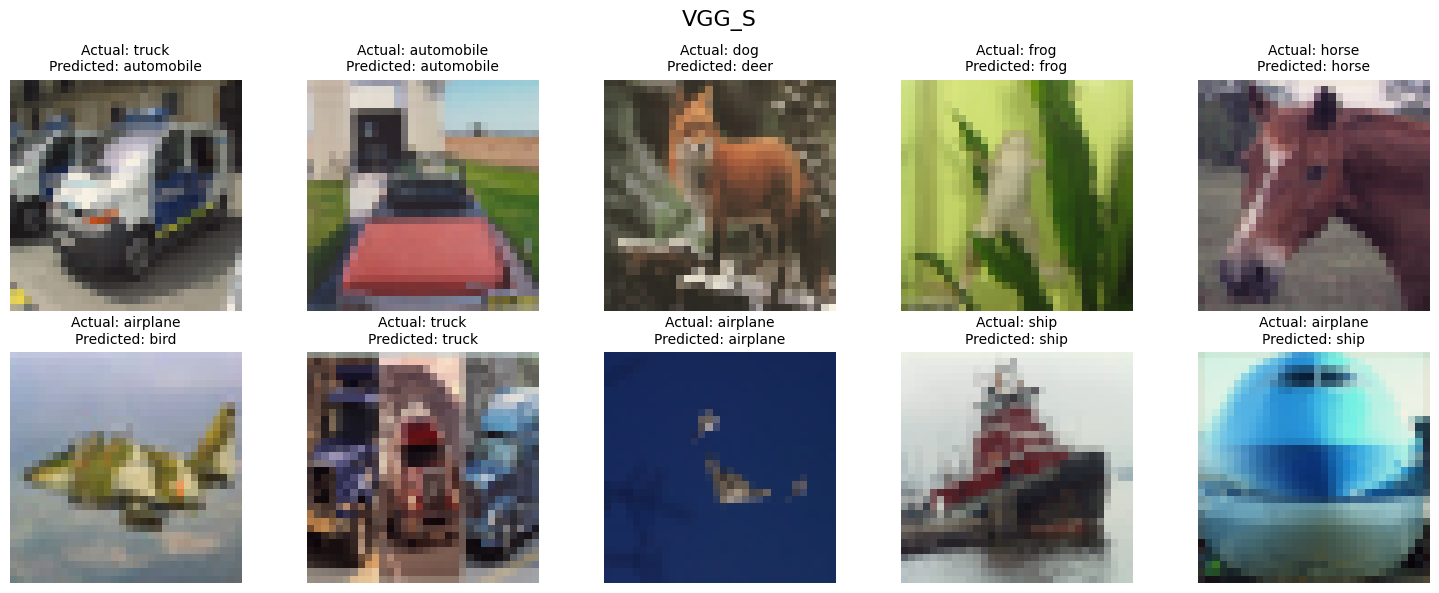

In [34]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Adam


### VGG S Adam


In [35]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [36]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.7156 Acc: 0.3305


KeyboardInterrupt: 

In [ ]:
title = 'VGG_S_Adam'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

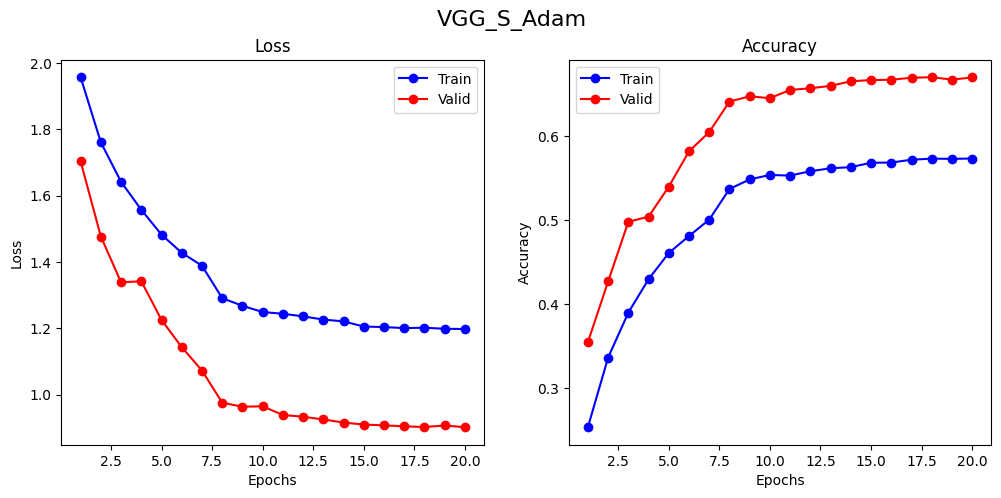

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6707

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.77      0.79      9000
  automobile       0.75      0.75      0.75      9000
        bird       0.64      0.60      0.62      9000
         cat       0.50      0.47      0.48      9000
        deer       0.58      0.57      0.57      9000
         dog       0.48      0.48      0.48      9000
        frog       0.73      0.80      0.77      9000
       horse       0.70      0.74      0.72      9000
        ship       0.76      0.80      0.78      9000
       truck       0.74      0.72      0.73      9000

    accuracy                           0.67     90000
   macro avg       0.67      0.67      0.67     90000
weighted avg       0.67      0.67      0.67     90000



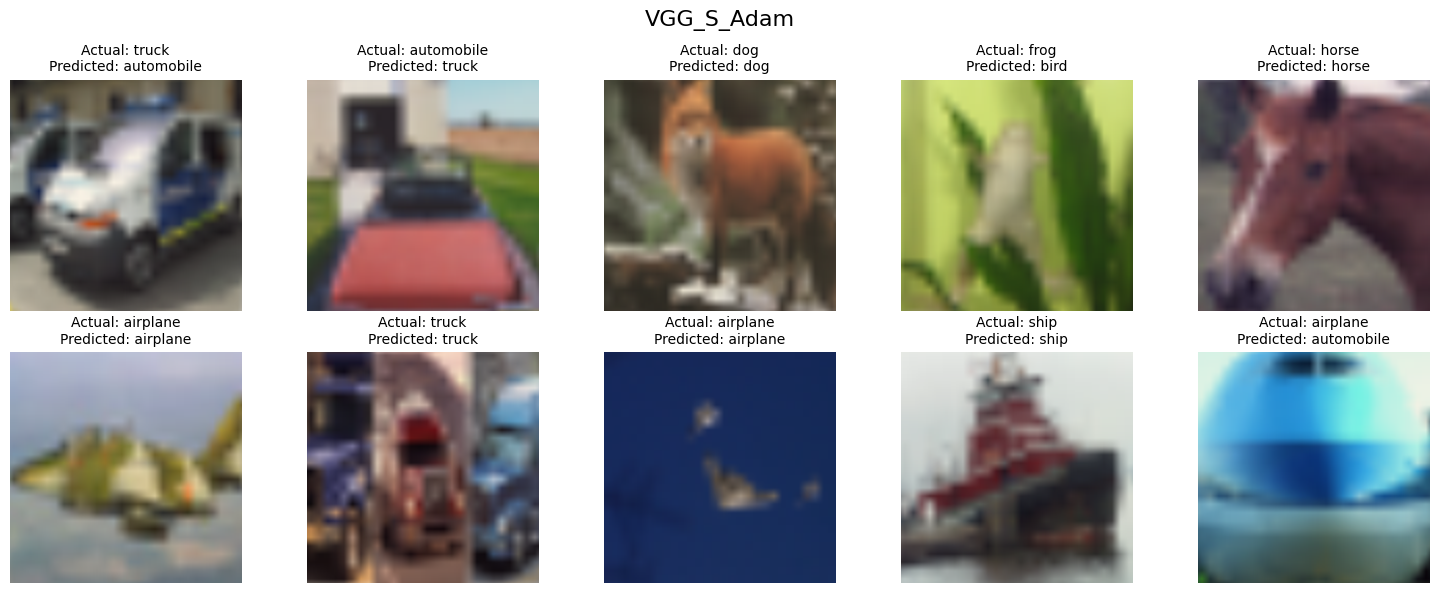

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S ADAM wd = 0.001


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0247 Acc: 0.2221
valid Loss: 1.9244 Acc: 0.2682

Epoch 1/19
----------
train Loss: 1.9274 Acc: 0.2614
valid Loss: 1.7491 Acc: 0.3185

Epoch 2/19
----------
train Loss: 1.8067 Acc: 0.3149
valid Loss: 1.6852 Acc: 0.3632

Epoch 3/19
----------
train Loss: 1.7280 Acc: 0.3525
valid Loss: 1.5471 Acc: 0.4199

Epoch 4/19
----------
train Loss: 1.6860 Acc: 0.3753
valid Loss: 1.4874 Acc: 0.4473

Epoch 5/19
----------
train Loss: 1.6583 Acc: 0.3897
valid Loss: 1.4132 Acc: 0.4729

Epoch 6/19
----------
train Loss: 1.6302 Acc: 0.4011
valid Loss: 1.4266 Acc: 0.4576

Epoch 7/19
----------
train Loss: 1.5545 Acc: 0.4331
valid Loss: 1.2986 Acc: 0.5214

Epoch 8/19
----------
train Loss: 1.5378 Acc: 0.4395
valid Loss: 1.2889 Acc: 0.5275

Epoch 9/19
----------
train Loss: 1.5271 Acc: 0.4435
valid Loss: 1.2778 Acc: 0.5292

Epoch 10/19
----------
train Loss: 1.5165 Acc: 0.4468
valid Loss: 1.2658 Acc: 0.5356

Epoch 11/19
----------
train Loss: 1.5101 Acc: 0.4509
valid Loss

In [ ]:
title = 'VGG_S_Adam_WG0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

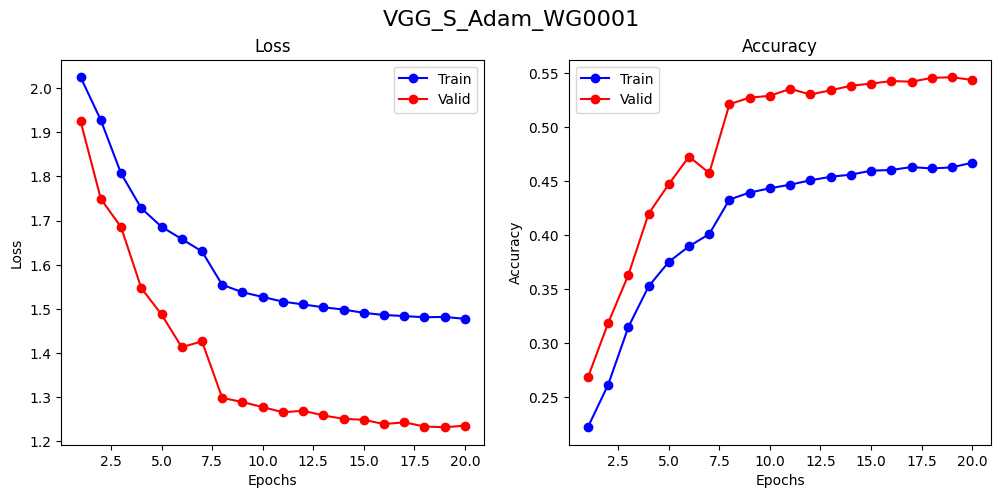

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5462

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.68      0.67      9000
  automobile       0.62      0.66      0.64      9000
        bird       0.46      0.39      0.42      9000
         cat       0.38      0.29      0.33      9000
        deer       0.46      0.41      0.43      9000
         dog       0.40      0.30      0.34      9000
        frog       0.54      0.76      0.63      9000
       horse       0.56      0.70      0.62      9000
        ship       0.66      0.65      0.66      9000
       truck       0.61      0.62      0.62      9000

    accuracy                           0.55     90000
   macro avg       0.54      0.55      0.54     90000
weighted avg       0.54      0.55      0.54     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S ADAM wd = 0.01


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0585 Acc: 0.2085
valid Loss: 1.9583 Acc: 0.2291

Epoch 1/19
----------
train Loss: 1.9874 Acc: 0.2277
valid Loss: 2.0739 Acc: 0.2070

Epoch 2/19
----------
train Loss: 1.9496 Acc: 0.2398
valid Loss: 1.8858 Acc: 0.2503

Epoch 3/19
----------
train Loss: 1.9385 Acc: 0.2425
valid Loss: 1.8423 Acc: 0.2642

Epoch 4/19
----------
train Loss: 1.9227 Acc: 0.2487
valid Loss: 1.8583 Acc: 0.2592

Epoch 5/19
----------
train Loss: 1.9122 Acc: 0.2525
valid Loss: 1.8160 Acc: 0.2666

Epoch 6/19
----------
train Loss: 1.9039 Acc: 0.2615
valid Loss: 1.8017 Acc: 0.2838

Epoch 7/19
----------
train Loss: 1.8588 Acc: 0.2758
valid Loss: 1.7330 Acc: 0.3087

Epoch 8/19
----------
train Loss: 1.8501 Acc: 0.2803
valid Loss: 1.7303 Acc: 0.3195

Epoch 9/19
----------
train Loss: 1.8439 Acc: 0.2815
valid Loss: 1.7242 Acc: 0.3103

Epoch 10/19
----------
train Loss: 1.8399 Acc: 0.2834
valid Loss: 1.7191 Acc: 0.3124

Epoch 11/19
----------
train Loss: 1.8381 Acc: 0.2842
valid Loss

In [ ]:
title = 'VGG_S_Adam_WG001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

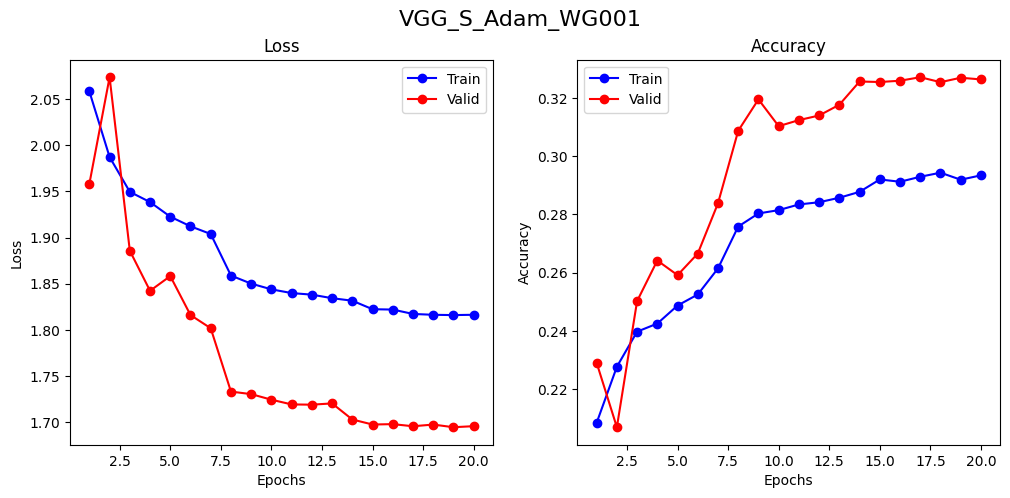

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3264

Classification Report:
              precision    recall  f1-score   support

    airplane       0.46      0.61      0.52      9000
  automobile       0.32      0.23      0.27      9000
        bird       0.27      0.25      0.26      9000
         cat       0.19      0.10      0.13      9000
        deer       0.16      0.00      0.01      9000
         dog       0.21      0.07      0.10      9000
        frog       0.30      0.77      0.43      9000
       horse       0.31      0.48      0.37      9000
        ship       0.26      0.14      0.18      9000
       truck       0.43      0.61      0.50      9000

    accuracy                           0.33     90000
   macro avg       0.29      0.33      0.28     90000
weighted avg       0.29      0.33      0.28     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Weight decay


### VGG S SGD wd = 0.001


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8579 Acc: 0.3021
valid Loss: 1.5351 Acc: 0.4376

Epoch 1/19
----------
train Loss: 1.6558 Acc: 0.3899
valid Loss: 1.4250 Acc: 0.4715

Epoch 2/19
----------
train Loss: 1.5519 Acc: 0.4369
valid Loss: 1.2603 Acc: 0.5336

Epoch 3/19
----------
train Loss: 1.4915 Acc: 0.4593
valid Loss: 1.2821 Acc: 0.5218

Epoch 4/19
----------
train Loss: 1.4334 Acc: 0.4814
valid Loss: 1.1432 Acc: 0.5809

Epoch 5/19
----------
train Loss: 1.3950 Acc: 0.4990
valid Loss: 1.2186 Acc: 0.5409

Epoch 6/19
----------
train Loss: 1.3592 Acc: 0.5105
valid Loss: 1.1125 Acc: 0.5963

Epoch 7/19
----------
train Loss: 1.2588 Acc: 0.5486
valid Loss: 0.9612 Acc: 0.6554

Epoch 8/19
----------
train Loss: 1.2309 Acc: 0.5624
valid Loss: 0.9370 Acc: 0.6630

Epoch 9/19
----------
train Loss: 1.2200 Acc: 0.5642
valid Loss: 0.9311 Acc: 0.6659

Epoch 10/19
----------
train Loss: 1.2089 Acc: 0.5712
valid Loss: 0.9107 Acc: 0.6717

Epoch 11/19
----------
train Loss: 1.1974 Acc: 0.5738
valid Loss

In [ ]:
title = 'VGG_S_SGD_WD0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

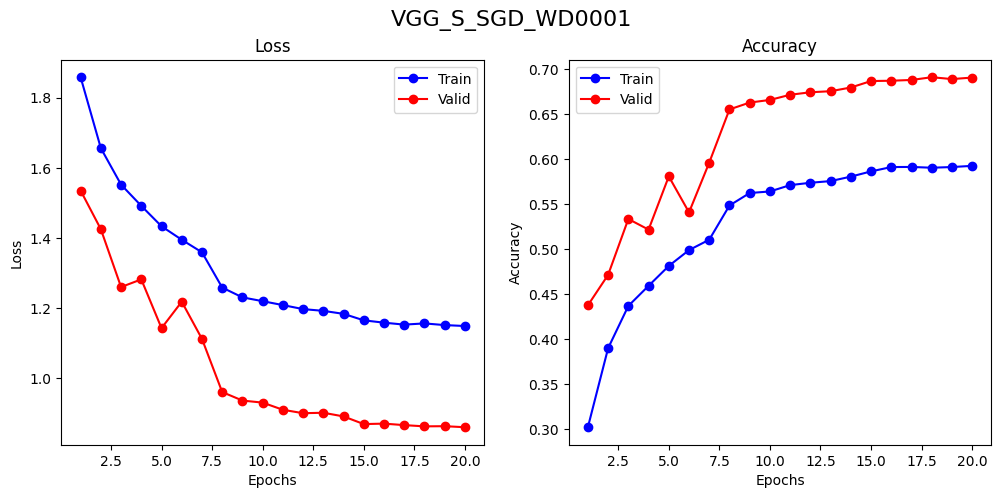

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6873

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.78      0.80      9000
  automobile       0.75      0.76      0.76      9000
        bird       0.66      0.61      0.63      9000
         cat       0.52      0.51      0.52      9000
        deer       0.59      0.60      0.60      9000
         dog       0.51      0.53      0.52      9000
        frog       0.76      0.80      0.78      9000
       horse       0.73      0.74      0.74      9000
        ship       0.78      0.81      0.79      9000
       truck       0.74      0.74      0.74      9000

    accuracy                           0.69     90000
   macro avg       0.69      0.69      0.69     90000
weighted avg       0.69      0.69      0.69     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD wd = 0.01


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8689 Acc: 0.3009
valid Loss: 1.6023 Acc: 0.4085

Epoch 1/19
----------
train Loss: 1.6889 Acc: 0.3780
valid Loss: 1.5123 Acc: 0.4359

Epoch 2/19
----------
train Loss: 1.6120 Acc: 0.4102
valid Loss: 1.3911 Acc: 0.4892

Epoch 3/19
----------
train Loss: 1.5565 Acc: 0.4340
valid Loss: 1.3274 Acc: 0.5183

Epoch 4/19
----------
train Loss: 1.5253 Acc: 0.4465
valid Loss: 1.2857 Acc: 0.5334

Epoch 5/19
----------
train Loss: 1.4935 Acc: 0.4578
valid Loss: 1.3505 Acc: 0.4975

Epoch 6/19
----------
train Loss: 1.4652 Acc: 0.4732
valid Loss: 1.2241 Acc: 0.5667

Epoch 7/19
----------
train Loss: 1.3498 Acc: 0.5205
valid Loss: 1.0508 Acc: 0.6347

Epoch 8/19
----------
train Loss: 1.3051 Acc: 0.5377
valid Loss: 1.0457 Acc: 0.6399

Epoch 9/19
----------
train Loss: 1.2820 Acc: 0.5463
valid Loss: 1.0076 Acc: 0.6496

Epoch 10/19
----------
train Loss: 1.2697 Acc: 0.5496
valid Loss: 0.9877 Acc: 0.6582

Epoch 11/19
----------
train Loss: 1.2553 Acc: 0.5551
valid Loss

In [ ]:
title = 'VGG_S_SGD_WD001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

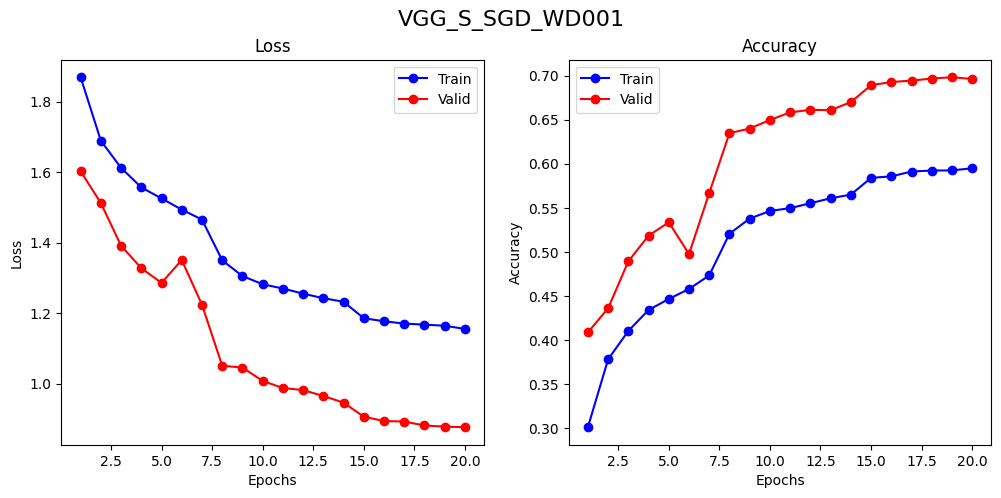

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6963

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.81      0.80      9000
  automobile       0.77      0.76      0.76      9000
        bird       0.64      0.67      0.65      9000
         cat       0.55      0.49      0.52      9000
        deer       0.62      0.59      0.60      9000
         dog       0.50      0.50      0.50      9000
        frog       0.80      0.82      0.81      9000
       horse       0.74      0.78      0.76      9000
        ship       0.77      0.84      0.80      9000
       truck       0.76      0.72      0.74      9000

    accuracy                           0.70     90000
   macro avg       0.69      0.70      0.69     90000
weighted avg       0.69      0.70      0.69     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD wd = 0.1


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0554 Acc: 0.2204
valid Loss: 2.0863 Acc: 0.2142

Epoch 1/19
----------
train Loss: 2.1465 Acc: 0.1877
valid Loss: 2.1535 Acc: 0.1822

Epoch 2/19
----------
train Loss: 2.1934 Acc: 0.1857
valid Loss: 2.1866 Acc: 0.1620

Epoch 3/19
----------
train Loss: 2.2178 Acc: 0.1834
valid Loss: 2.2028 Acc: 0.1747

Epoch 4/19
----------
train Loss: 2.2175 Acc: 0.1814
valid Loss: 2.1888 Acc: 0.1688

Epoch 5/19
----------
train Loss: 2.2199 Acc: 0.1821
valid Loss: 2.2285 Acc: 0.1967

Epoch 6/19
----------
train Loss: 2.2176 Acc: 0.1834
valid Loss: 2.2135 Acc: 0.1946

Epoch 7/19
----------
train Loss: 2.2098 Acc: 0.1848
valid Loss: 2.1940 Acc: 0.1893

Epoch 8/19
----------
train Loss: 2.2035 Acc: 0.1839
valid Loss: 2.1902 Acc: 0.1886

Epoch 9/19
----------
train Loss: 2.1977 Acc: 0.1847
valid Loss: 2.1654 Acc: 0.1868

Epoch 10/19
----------
train Loss: 2.1941 Acc: 0.1854
valid Loss: 2.1666 Acc: 0.1827

Epoch 11/19
----------
train Loss: 2.1896 Acc: 0.1846
valid Loss

In [ ]:
title = 'VGG_S_SGD_WD01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

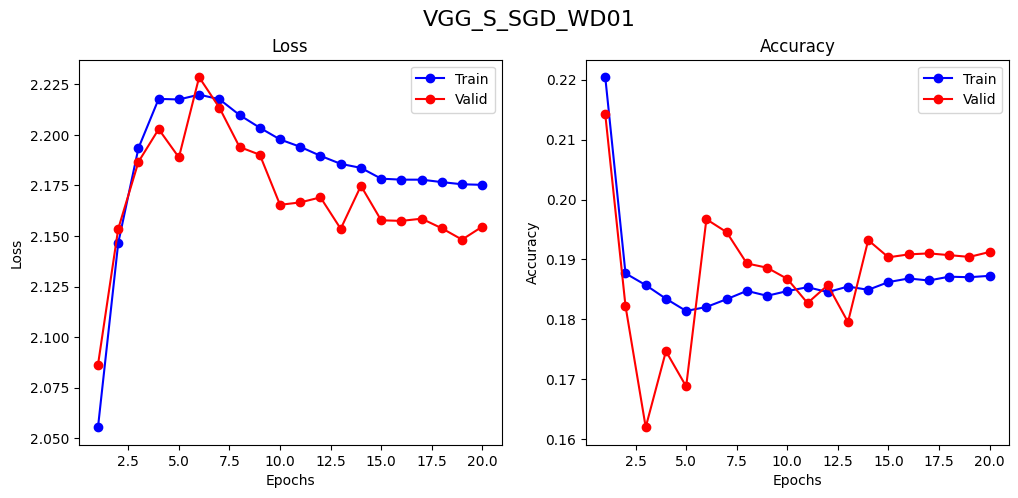

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.2130

Classification Report:
              precision    recall  f1-score   support

    airplane       0.28      0.77      0.42      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.15      0.05      0.08      9000
         cat       0.16      0.01      0.02      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.21      0.84      0.33      9000
       horse       0.14      0.00      0.00      9000
        ship       0.09      0.00      0.01      9000
       truck       0.16      0.45      0.24      9000

    accuracy                           0.21     90000
   macro avg       0.12      0.21      0.11     90000
weighted avg       0.12      0.21      0.11     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

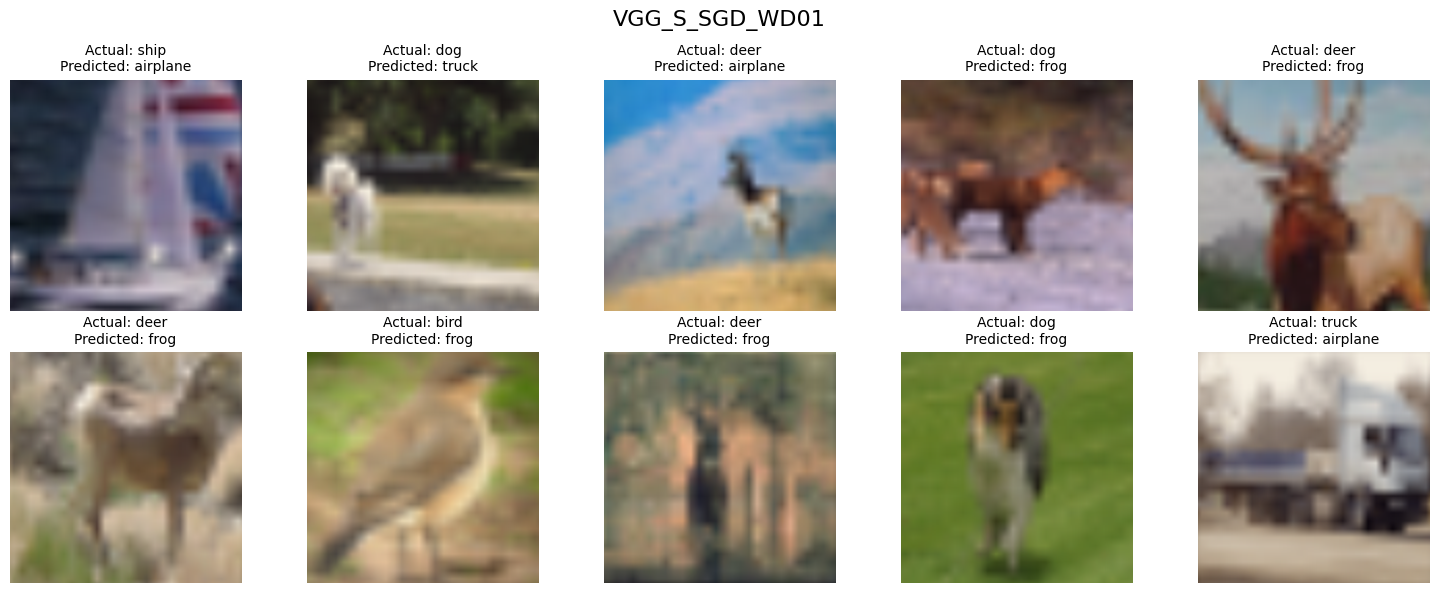

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Learning rate


### VGG S SGD lr = 0.01


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9394 Acc: 0.2603
valid Loss: 1.6589 Acc: 0.3599

Epoch 1/19
----------
train Loss: 1.7477 Acc: 0.3430
valid Loss: 1.5058 Acc: 0.4471

Epoch 2/19
----------
train Loss: 1.6357 Acc: 0.3983
valid Loss: 1.4261 Acc: 0.4736

Epoch 3/19
----------
train Loss: 1.5564 Acc: 0.4286
valid Loss: 1.2560 Acc: 0.5333

Epoch 4/19
----------
train Loss: 1.4888 Acc: 0.4569
valid Loss: 1.1604 Acc: 0.5727

Epoch 5/19
----------
train Loss: 1.4428 Acc: 0.4750
valid Loss: 1.1357 Acc: 0.5814

Epoch 6/19
----------
train Loss: 1.3970 Acc: 0.4964
valid Loss: 1.1581 Acc: 0.5711

Epoch 7/19
----------
train Loss: 1.2807 Acc: 0.5421
valid Loss: 0.9597 Acc: 0.6482

Epoch 8/19
----------
train Loss: 1.2499 Acc: 0.5524
valid Loss: 0.9457 Acc: 0.6535

Epoch 9/19
----------
train Loss: 1.2357 Acc: 0.5595
valid Loss: 0.9296 Acc: 0.6597

Epoch 10/19
----------
train Loss: 1.2240 Acc: 0.5638
valid Loss: 0.9158 Acc: 0.6660

Epoch 11/19
----------
train Loss: 1.2091 Acc: 0.5690
valid Loss

In [ ]:
title = 'VGG_S_SGD_LR001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

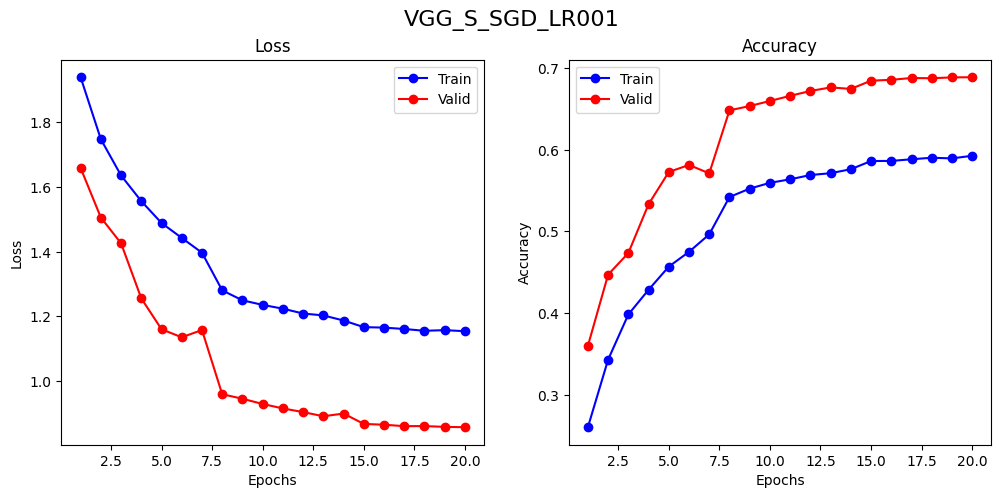

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6872

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.77      0.79      9000
  automobile       0.75      0.75      0.75      9000
        bird       0.65      0.63      0.64      9000
         cat       0.53      0.49      0.51      9000
        deer       0.59      0.61      0.60      9000
         dog       0.52      0.48      0.50      9000
        frog       0.72      0.85      0.78      9000
       horse       0.72      0.76      0.74      9000
        ship       0.79      0.79      0.79      9000
       truck       0.75      0.74      0.75      9000

    accuracy                           0.69     90000
   macro avg       0.68      0.69      0.68     90000
weighted avg       0.68      0.69      0.68     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD lr = 0.1


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.1807 Acc: 0.1552
valid Loss: 2.0974 Acc: 0.1691

Epoch 1/19
----------
train Loss: 2.1155 Acc: 0.1708
valid Loss: 1.9784 Acc: 0.2086

Epoch 2/19
----------
train Loss: 2.0658 Acc: 0.2022
valid Loss: 1.8736 Acc: 0.2699

Epoch 3/19
----------
train Loss: 2.0092 Acc: 0.2299
valid Loss: 1.7620 Acc: 0.3053

Epoch 4/19
----------
train Loss: 1.9550 Acc: 0.2529
valid Loss: 1.6757 Acc: 0.3432

Epoch 5/19
----------
train Loss: 1.8813 Acc: 0.2764
valid Loss: 1.5998 Acc: 0.3766

Epoch 6/19
----------
train Loss: 1.8337 Acc: 0.2965
valid Loss: 1.6189 Acc: 0.3790

Epoch 7/19
----------
train Loss: 1.6842 Acc: 0.3620
valid Loss: 1.3866 Acc: 0.4743

Epoch 8/19
----------
train Loss: 1.6473 Acc: 0.3788
valid Loss: 1.3587 Acc: 0.4929

Epoch 9/19
----------
train Loss: 1.6331 Acc: 0.3868
valid Loss: 1.3318 Acc: 0.5033

Epoch 10/19
----------
train Loss: 1.6140 Acc: 0.3935
valid Loss: 1.3329 Acc: 0.5084

Epoch 11/19
----------
train Loss: 1.5994 Acc: 0.4012
valid Loss

In [ ]:
title = 'VGG_S_SGD_LR01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

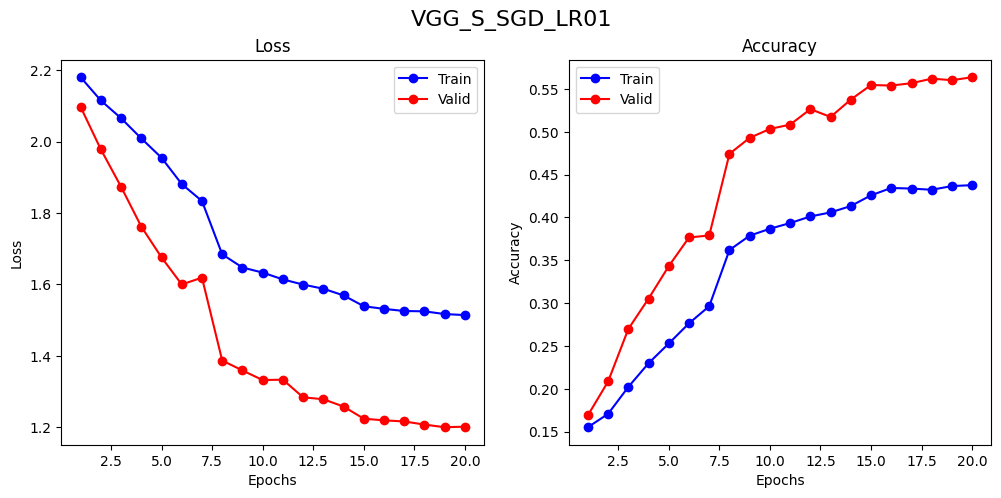

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5613

Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.70      0.70      9000
  automobile       0.65      0.61      0.63      9000
        bird       0.50      0.41      0.45      9000
         cat       0.36      0.36      0.36      9000
        deer       0.49      0.34      0.40      9000
         dog       0.39      0.35      0.37      9000
        frog       0.58      0.77      0.66      9000
       horse       0.59      0.71      0.64      9000
        ship       0.67      0.68      0.68      9000
       truck       0.61      0.68      0.64      9000

    accuracy                           0.56     90000
   macro avg       0.55      0.56      0.55     90000
weighted avg       0.55      0.56      0.55     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Momentum


### VGG S SGD momentum = 0


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0466 Acc: 0.2337
valid Loss: 1.8102 Acc: 0.3404

Epoch 1/19
----------
train Loss: 1.8776 Acc: 0.2978
valid Loss: 1.6730 Acc: 0.3787

Epoch 2/19
----------
train Loss: 1.7975 Acc: 0.3330
valid Loss: 1.6122 Acc: 0.4025

Epoch 3/19
----------
train Loss: 1.7337 Acc: 0.3584
valid Loss: 1.5490 Acc: 0.4326

Epoch 4/19
----------
train Loss: 1.6878 Acc: 0.3790
valid Loss: 1.4601 Acc: 0.4645

Epoch 5/19
----------
train Loss: 1.6492 Acc: 0.3960
valid Loss: 1.4445 Acc: 0.4687

Epoch 6/19
----------
train Loss: 1.6168 Acc: 0.4095
valid Loss: 1.4114 Acc: 0.4889

Epoch 7/19
----------
train Loss: 1.5625 Acc: 0.4323
valid Loss: 1.3305 Acc: 0.5192

Epoch 8/19
----------
train Loss: 1.5542 Acc: 0.4351
valid Loss: 1.3307 Acc: 0.5170

Epoch 9/19
----------
train Loss: 1.5487 Acc: 0.4351
valid Loss: 1.3093 Acc: 0.5274

Epoch 10/19
----------
train Loss: 1.5410 Acc: 0.4421
valid Loss: 1.3101 Acc: 0.5273

Epoch 11/19
----------
train Loss: 1.5368 Acc: 0.4420
valid Loss

In [ ]:
title = 'VGG_S_SGD_M0'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

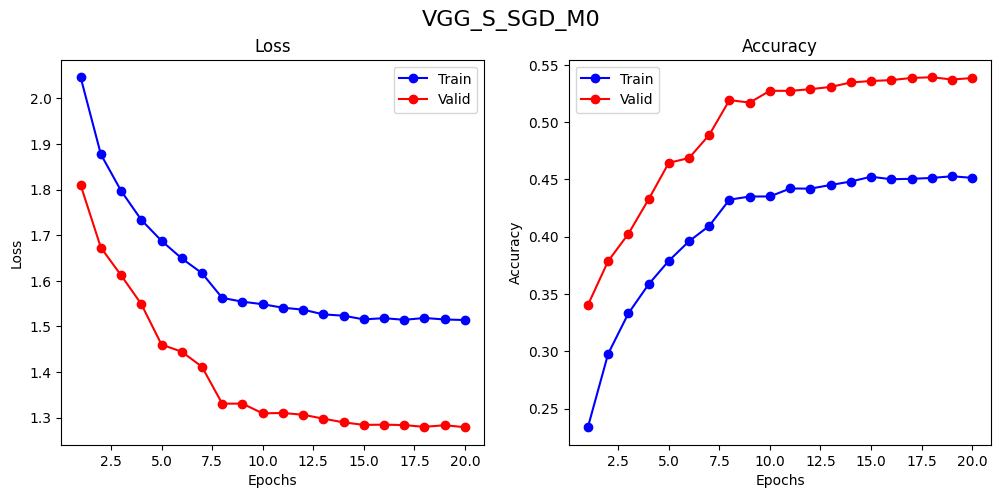

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5388

Classification Report:
              precision    recall  f1-score   support

    airplane       0.65      0.65      0.65      9000
  automobile       0.61      0.63      0.62      9000
        bird       0.45      0.39      0.42      9000
         cat       0.39      0.32      0.35      9000
        deer       0.46      0.38      0.42      9000
         dog       0.42      0.34      0.38      9000
        frog       0.57      0.77      0.65      9000
       horse       0.54      0.70      0.61      9000
        ship       0.64      0.59      0.61      9000
       truck       0.58      0.61      0.59      9000

    accuracy                           0.54     90000
   macro avg       0.53      0.54      0.53     90000
weighted avg       0.53      0.54      0.53     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD momentum = 0.5


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9751 Acc: 0.2588
valid Loss: 1.7604 Acc: 0.3509

Epoch 1/19
----------
train Loss: 1.8023 Acc: 0.3266
valid Loss: 1.5825 Acc: 0.4129

Epoch 2/19
----------
train Loss: 1.7166 Acc: 0.3655
valid Loss: 1.5257 Acc: 0.4399

Epoch 3/19
----------
train Loss: 1.6597 Acc: 0.3894
valid Loss: 1.5079 Acc: 0.4506

Epoch 4/19
----------
train Loss: 1.6106 Acc: 0.4100
valid Loss: 1.4853 Acc: 0.4580

Epoch 5/19
----------
train Loss: 1.5673 Acc: 0.4292
valid Loss: 1.3785 Acc: 0.4914

Epoch 6/19
----------
train Loss: 1.5333 Acc: 0.4441
valid Loss: 1.3345 Acc: 0.5088

Epoch 7/19
----------
train Loss: 1.4689 Acc: 0.4702
valid Loss: 1.2206 Acc: 0.5579

Epoch 8/19
----------
train Loss: 1.4530 Acc: 0.4752
valid Loss: 1.2039 Acc: 0.5678

Epoch 9/19
----------
train Loss: 1.4446 Acc: 0.4793
valid Loss: 1.2022 Acc: 0.5662

Epoch 10/19
----------
train Loss: 1.4384 Acc: 0.4818
valid Loss: 1.1861 Acc: 0.5695

Epoch 11/19
----------
train Loss: 1.4284 Acc: 0.4857
valid Loss

In [ ]:
title = 'VGG_S_SGD_M05'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

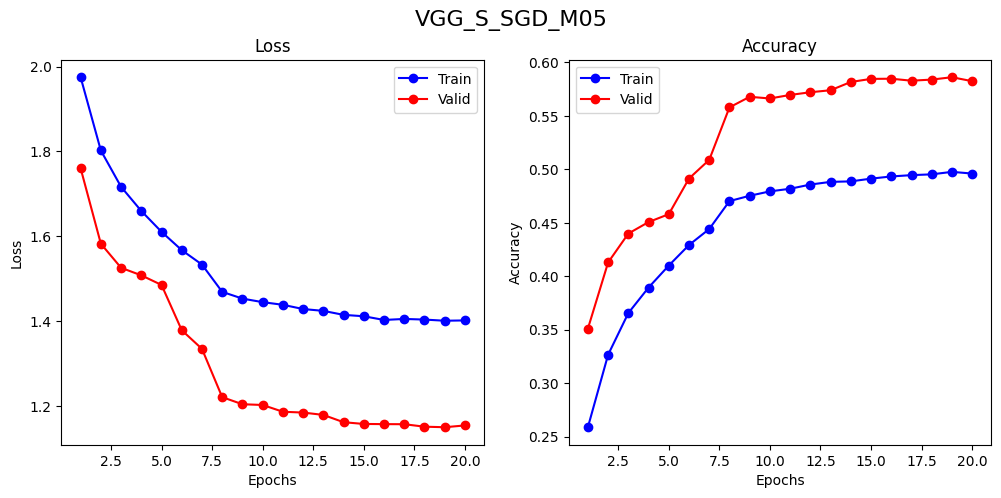

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5838

Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.70      0.71      9000
  automobile       0.65      0.69      0.67      9000
        bird       0.53      0.45      0.49      9000
         cat       0.42      0.38      0.40      9000
        deer       0.51      0.41      0.46      9000
         dog       0.43      0.39      0.41      9000
        frog       0.61      0.78      0.69      9000
       horse       0.60      0.70      0.65      9000
        ship       0.69      0.66      0.67      9000
       truck       0.63      0.68      0.65      9000

    accuracy                           0.58     90000
   macro avg       0.58      0.58      0.58     90000
weighted avg       0.58      0.58      0.58     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD 10 epochs


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=10
)

Epoch 0/9
----------
train Loss: 1.8620 Acc: 0.3041
valid Loss: 1.5695 Acc: 0.4189

Epoch 1/9
----------
train Loss: 1.6645 Acc: 0.3881
valid Loss: 1.4905 Acc: 0.4496

Epoch 2/9
----------
train Loss: 1.5688 Acc: 0.4299
valid Loss: 1.3212 Acc: 0.5149

Epoch 3/9
----------
train Loss: 1.4999 Acc: 0.4592
valid Loss: 1.3264 Acc: 0.5040

Epoch 4/9
----------
train Loss: 1.4434 Acc: 0.4775
valid Loss: 1.3465 Acc: 0.5216

Epoch 5/9
----------
train Loss: 1.3977 Acc: 0.4959
valid Loss: 1.1118 Acc: 0.5932

Epoch 6/9
----------
train Loss: 1.3558 Acc: 0.5117
valid Loss: 1.1126 Acc: 0.5905

Epoch 7/9
----------
train Loss: 1.2561 Acc: 0.5507
valid Loss: 0.9556 Acc: 0.6541

Epoch 8/9
----------
train Loss: 1.2304 Acc: 0.5614
valid Loss: 0.9427 Acc: 0.6589

Epoch 9/9
----------
train Loss: 1.2173 Acc: 0.5666
valid Loss: 0.9287 Acc: 0.6636

Training complete in 75m 40s
Best val Acc: 0.663633


In [ ]:
title = 'VGG_S_SGD_EPOCHS10'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

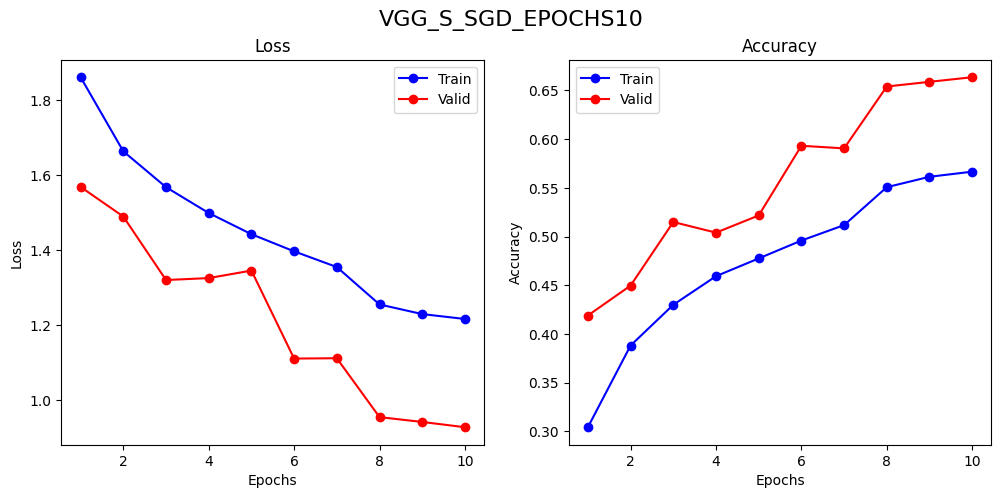

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6602

Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.76      0.77      9000
  automobile       0.74      0.72      0.73      9000
        bird       0.64      0.57      0.60      9000
         cat       0.48      0.48      0.48      9000
        deer       0.59      0.52      0.55      9000
         dog       0.46      0.55      0.50      9000
        frog       0.78      0.74      0.76      9000
       horse       0.70      0.73      0.72      9000
        ship       0.74      0.80      0.77      9000
       truck       0.72      0.73      0.73      9000

    accuracy                           0.66     90000
   macro avg       0.66      0.66      0.66     90000
weighted avg       0.66      0.66      0.66     90000



In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD 25 epochs


In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=25
)

Epoch 0/24
----------
train Loss: 1.8572 Acc: 0.3082
valid Loss: 1.5538 Acc: 0.4291

Epoch 1/24
----------
train Loss: 1.6501 Acc: 0.3946
valid Loss: 1.4124 Acc: 0.4726

Epoch 2/24
----------
train Loss: 1.5541 Acc: 0.4319
valid Loss: 1.3012 Acc: 0.5267

Epoch 3/24
----------
train Loss: 1.4858 Acc: 0.4626
valid Loss: 1.2411 Acc: 0.5500

Epoch 4/24
----------
train Loss: 1.4254 Acc: 0.4828
valid Loss: 1.2316 Acc: 0.5499

Epoch 5/24
----------
train Loss: 1.3851 Acc: 0.5017
valid Loss: 1.1524 Acc: 0.5797

Epoch 6/24
----------
train Loss: 1.3465 Acc: 0.5169
valid Loss: 1.0903 Acc: 0.6026

Epoch 7/24
----------
train Loss: 1.2471 Acc: 0.5517
valid Loss: 0.9417 Acc: 0.6626

Epoch 8/24
----------
train Loss: 1.2219 Acc: 0.5647
valid Loss: 0.9491 Acc: 0.6585

Epoch 9/24
----------
train Loss: 1.2084 Acc: 0.5700
valid Loss: 0.9217 Acc: 0.6670

Epoch 10/24
----------
train Loss: 1.2012 Acc: 0.5742
valid Loss: 0.9123 Acc: 0.6728

Epoch 11/24
----------
train Loss: 1.1868 Acc: 0.5774
valid Loss

In [ ]:
title = 'VGG_S_SGD_EPOCHS25'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

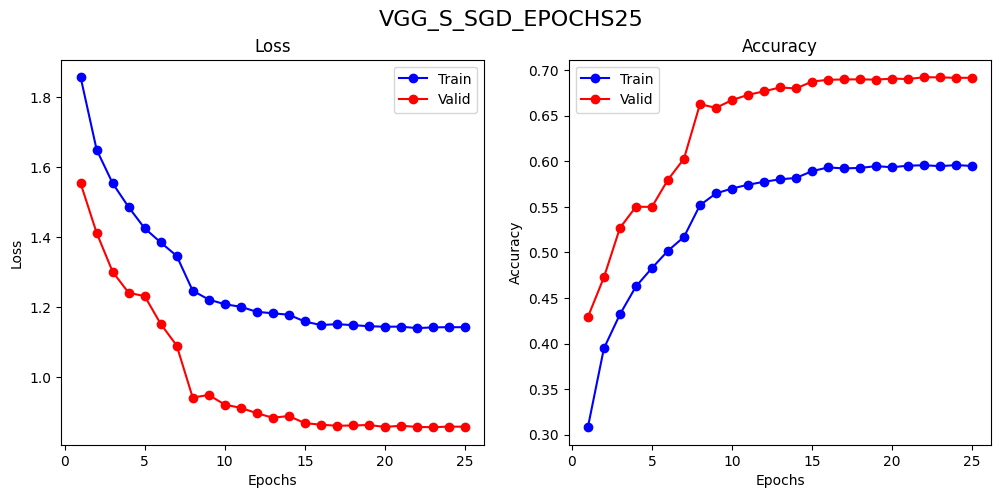

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6898

Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.77      0.79      9000
  automobile       0.75      0.74      0.75      9000
        bird       0.66      0.61      0.63      9000
         cat       0.54      0.55      0.54      9000
        deer       0.61      0.59      0.60      9000
         dog       0.54      0.49      0.51      9000
        frog       0.73      0.84      0.78      9000
       horse       0.73      0.75      0.74      9000
        ship       0.78      0.81      0.79      9000
       truck       0.72      0.76      0.74      9000

    accuracy                           0.69     90000
   macro avg       0.69      0.69      0.69     90000
weighted avg       0.69      0.69      0.69     90000



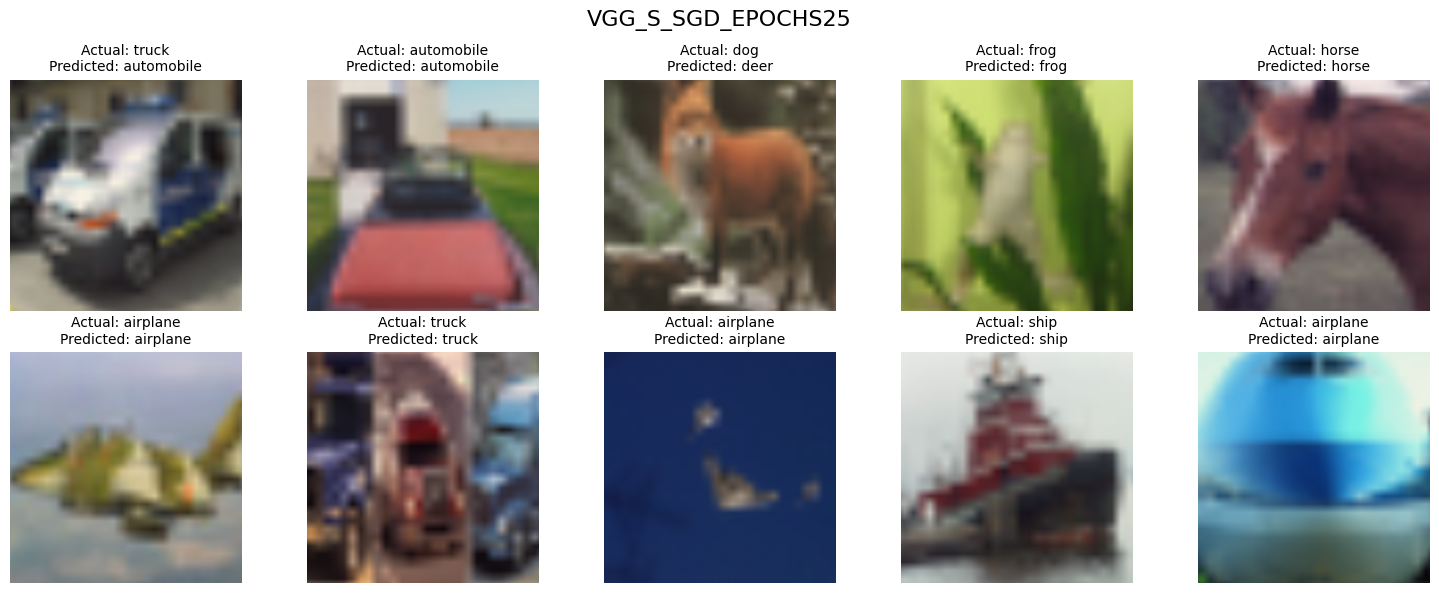

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Augmentation


In [ ]:
from torchvision import transforms

In [ ]:
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]

### VGG S SGD Augmentation = None


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = transform, test_transform=transform, valid_transform=transform)

In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.7422 Acc: 0.3295
valid Loss: 1.5629 Acc: 0.4168

Epoch 1/19
----------
train Loss: 1.5973 Acc: 0.3991
valid Loss: 1.5633 Acc: 0.4088

Epoch 2/19
----------
train Loss: 1.5552 Acc: 0.4196
valid Loss: 1.7845 Acc: 0.3370

Epoch 3/19
----------
train Loss: 1.5377 Acc: 0.4333
valid Loss: 1.6026 Acc: 0.3965

Epoch 4/19
----------
train Loss: 1.5130 Acc: 0.4543
valid Loss: 1.6254 Acc: 0.4230

Epoch 5/19
----------
train Loss: 1.4931 Acc: 0.4650
valid Loss: 2.1413 Acc: 0.3186

Epoch 6/19
----------
train Loss: 1.4911 Acc: 0.4695
valid Loss: 1.8780 Acc: 0.3554

Epoch 7/19
----------
train Loss: 1.2119 Acc: 0.5791
valid Loss: 1.1025 Acc: 0.6048

Epoch 8/19
----------
train Loss: 1.1327 Acc: 0.6096
valid Loss: 1.0591 Acc: 0.6263

Epoch 9/19
----------
train Loss: 1.0975 Acc: 0.6267
valid Loss: 1.2041 Acc: 0.5759

Epoch 10/19
----------
train Loss: 1.0636 Acc: 0.6389
valid Loss: 1.0371 Acc: 0.6320

Epoch 11/19
----------
train Loss: 1.0307 Acc: 0.6517
valid Loss

KeyboardInterrupt: 

In [ ]:
title = 'VGG_S_SGD_AUG_NONE'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD Augmentation = ColorJitter


In [ ]:
train_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [ ]:
train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(cinic_mean, cinic_std)
    ])

data = Data(data_dir, train_transform = train_transform)

In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

In [ ]:
title = 'VGG_S_SGD_AUG_ColorJitter'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG S SGD Augmentation = Gray Scale + GaussianBlur


In [ ]:
train_transform = transforms.Compose([
    transforms.RandomGrayscale(p=0.1)
    transforms.GaussianBlur(kernel_size=3)
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

In [ ]:
title = 'VGG_S_SGD_AUG_Grayscale_Blur'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VGG S SGD Augmentation = Auto Augment


In [ ]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [ ]:
model = VGG_S(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

In [ ]:
title = 'VGG_S_SGD_AUG_AUTO'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

In [ ]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [ ]:
test_model(model, data.dataloaders['test'], device, folder)

In [ ]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)